## Лабораторная работа №1. Анализ социальных сетей. Twitter

In [1]:
import twint
import nltk
from nltk.tokenize import word_tokenize
import nest_asyncio
nest_asyncio.apply()

In [2]:
%%time

c = twint.Config()
#c.Username = "elonmusk"
c.Lang = "en"
c.Hide_output = True
c.Search = ['putin']
c.Since = '2021-01-01'
c.until= '2021-12-17'
c.Limit = 10000

#c.Min_likes = 5000
#c.Min_replies = 100
#c.Min_retweets = 50

# Run
c.Pandas = True

twint.run.Search(c)

Tweets_df = twint.storage.panda.Tweets_df

Wall time: 6min 12s


In [3]:
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1471621378507948037,1471540563820388360,1.639697e+12,2021-12-17 03:20:52,+0400,,"@TheChiScroller @makeitmeehk @sparklecunt_ ""w@...",und,[],[],...,,,,,,"[{'screen_name': 'TheChiScroller', 'name': 'Ch...",,,,
1,1471621361143627781,1471620048213229568,1.639697e+12,2021-12-17 03:20:48,+0400,,@Loekiz @maddow Something Putin told him durin...,en,[],[],...,,,,,,"[{'screen_name': 'Loekiz', 'name': 'Loeki Zeij...",,,,
2,1471621348044718090,1471621348044718090,1.639697e+12,2021-12-17 03:20:45,+0400,,«Теперь шмонать можно всех»: чем опасен для ро...,ru,[],[],...,,,,,,[],,,,
3,1471621347235278855,1471574428026695682,1.639697e+12,2021-12-17 03:20:45,+0400,,@JackDetsch Until of course they convince them...,en,[],[],...,,,,,,"[{'screen_name': 'JackDetsch', 'name': 'Jack D...",,,,
4,1471621316214022145,1471621316214022145,1.639697e+12,2021-12-17 03:20:37,+0400,,Ivan Raiklin's own words Shall be used against...,en,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,1471402858369191937,1471402858369191937,1.639645e+12,2021-12-16 12:52:33,+0400,,Giochi pericolosi. Putin dice sì alle Olimpiad...,it,"[giochi, pericolosi, putin, olimpiadi, taiwan,...",[],...,,,,,,[],,,,
10005,1471402831802478592,1471226876442128388,1.639645e+12,2021-12-16 12:52:27,+0400,,@EllenDG1975 Eerst moet je onafhankelijk worde...,nl,[],[],...,,,,,,"[{'screen_name': 'EllenDG1975', 'name': 'D. G....",,,,
10006,1471402800315785217,1471342491844677634,1.639645e+12,2021-12-16 12:52:19,+0400,,@veitera @AL_Kauhanen ”Vaikka tarve diplomatia...,fi,[],[],...,,,,,,"[{'screen_name': 'veitera', 'name': 'Janne Rii...",,,,
10007,1471402749946380292,1471397865725571074,1.639645e+12,2021-12-16 12:52:07,+0400,,"@euidanmark 🤣 Putin har gassen, det er koldt o...",da,[],[],...,,,,,,"[{'screen_name': 'euidanmark', 'name': 'EU i D...",,,,


In [4]:
Tweets_df.to_csv('twitter_data.csv')

In [5]:
df = Tweets_df.copy()

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df['tweet']

0        @TheChiScroller @makeitmeehk @sparklecunt_ "w@...
1        @Loekiz @maddow Something Putin told him durin...
2        «Теперь шмонать можно всех»: чем опасен для ро...
3        @JackDetsch Until of course they convince them...
4        Ivan Raiklin's own words Shall be used against...
                               ...                        
10004    Giochi pericolosi. Putin dice sì alle Olimpiad...
10005    @EllenDG1975 Eerst moet je onafhankelijk worde...
10006    @veitera @AL_Kauhanen ”Vaikka tarve diplomatia...
10007    @euidanmark 🤣 Putin har gassen, det er koldt o...
10008    Das sich ein Altkanzler zum Helfershelfer von ...
Name: tweet, Length: 10009, dtype: object

In [8]:
%%time

df['tokenized_word'] = 0
df['tokenized_word'] = df['tweet'].apply(lambda x: word_tokenize(x.lower()))



Wall time: 10.1 s


In [9]:
df['tokenized_word'] 

0        [@, thechiscroller, @, makeitmeehk, @, sparkle...
1        [@, loekiz, @, maddow, something, putin, told,...
2        [«, теперь, шмонать, можно, всех, », :, чем, о...
3        [@, jackdetsch, until, of, course, they, convi...
4        [ivan, raiklin, 's, own, words, shall, be, use...
                               ...                        
10004    [giochi, pericolosi, ., putin, dice, sì, alle,...
10005    [@, ellendg1975, eerst, moet, je, onafhankelij...
10006    [@, veitera, @, al_kauhanen, ”, vaikka, tarve,...
10007    [@, euidanmark, 🤣, putin, har, gassen, ,, det,...
10008    [das, sich, ein, altkanzler, zum, helfershelfe...
Name: tokenized_word, Length: 10009, dtype: object

In [10]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [11]:
%%time

all_words = df['tokenized_word'].sum()

Wall time: 36.1 s


In [12]:
#l1=['hi','hello','welcome']

f = open('all_words_twitter.txt','w', encoding="utf-8")
for ele in all_words:
    f.write(ele+'\n')

In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
#print(stop_words)

In [14]:
filtered_words=[]
for w in all_words:
    if w not in stop_words:
        filtered_words.append(w)
#print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_words)

Filterd Sentence: ['@', 'thechiscroller', '@', 'makeitmeehk', '@', 'sparklecunt_', '``', 'w', '@', 'nker', "''", '@', 'loekiz', '@', 'maddow', 'something', 'putin', 'told', 'meetings', 'witnesses', 'present', '.', '«', 'теперь', 'шмонать', 'можно', 'всех', '»', ':', 'чем', 'опасен', 'для', 'россиян', 'обновленный', 'закон', '«', 'о', 'полиции', '»', '?', 'https', ':', '//t.co/eh8zmbajck', '@', 'jackdetsch', 'course', 'convince', 'somehow', 'providing', 'weapons', 'somehow', 'halt', 'putin', '’', 'offensive', 'lead', 'negotiate', '.', 'ivan', 'raiklin', "'s", 'words', 'shall', 'used', '&', 'amp', ';', 'rest', 'corrupted', 'connections', 'trump', "'s", '&', 'amp', ';', 'putin', "'s", '.', 'proudly', 'planning', 'military', 'coup', 'recording', '.', '@', 'john_sipher', '``', "'s", 'running', 'country', 'least', "'s", 'leader', ',', 'unlike', 'country', '.', "''", '-', 'trump', 'putin', ',', '2016.', 'rting', 'mussolini', '.', 'https', ':', '//t.co/n0jyct2gld', 'ce', 'moment', 'là', 'putin

In [15]:
from collections import Counter

counter = Counter(filtered_words)
counter.most_common(30)

[('@', 13180),
 ('.', 8984),
 ('putin', 7938),
 (',', 7483),
 (':', 4576),
 ('https', 3417),
 ('#', 2896),
 ('?', 1923),
 ('’', 1819),
 ('!', 1727),
 ('de', 1548),
 ("'s", 1242),
 ('russia', 991),
 ("''", 825),
 ('ukraine', 821),
 ('la', 812),
 ('``', 811),
 (';', 796),
 ('xi', 795),
 ('...', 693),
 (')', 684),
 ('&', 681),
 ('trump', 655),
 ('amp', 647),
 ('que', 601),
 ('(', 538),
 ("n't", 512),
 ('die', 504),
 ('biden', 498),
 ('-', 482)]

In [17]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
def remove_stopwords(tokens):
    stoplist = list(STOP_WORDS) + list(punctuation)
    return [t for t in tokens if t not in stoplist]

counter = Counter(remove_stopwords(filtered_words))

In [18]:
type(STOP_WORDS)

set

<AxesSubplot:xlabel='token'>

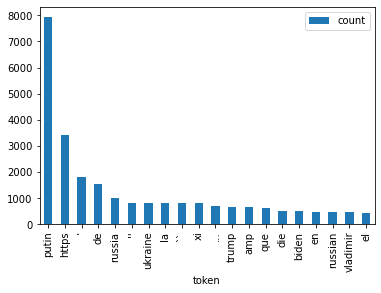

In [19]:
import pandas as pd

freq_df = pd.DataFrame.from_records(counter.most_common(20), columns = ['token', 'count'])

freq_df.plot(kind='bar', x='token')

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordlcloud(counter):
    wc = WordCloud(width=1200, height=800,
                  background_color='white',
                  max_words = 200)
    wc.generate_from_frequencies(counter)
    
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

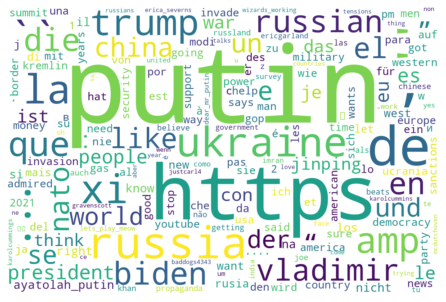

In [21]:
wordlcloud(counter)